In [1]:
import pandas as pd
import numpy as np

In [2]:
transactions = pd.read_csv("transactions.csv")

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [5]:
transactions=transactions.astype({"DAY":"int16","QUANTITY":"int32","STORE_ID":"int32","WEEK_NO":"int8"})

In [6]:
transactions.describe(include="all").round(2)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.00,2.146311e+06,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00,2146311.00
mean,1056.23,3.404897e+10,389.51,2884714.94,100.97,3.11,3267.94,-0.53,56.33,-0.02,-0.00
std,605.01,4.723748e+09,190.05,3831949.29,1152.36,4.19,9122.39,1.23,27.15,0.21,0.04
min,1.00,2.698490e+10,1.00,25671.00,0.00,0.00,1.00,-130.02,1.00,-55.93,-7.70
25%,548.00,3.040798e+10,229.00,917231.00,1.00,1.29,330.00,-0.68,33.00,0.00,0.00
50%,1042.00,3.281176e+10,392.00,1027960.00,1.00,2.00,372.00,0.00,57.00,0.00,0.00
75%,1581.00,4.012804e+10,555.00,1132771.00,1.00,3.49,422.00,0.00,80.00,0.00,0.00
max,2099.00,4.230536e+10,711.00,18316298.00,89638.00,840.00,34280.00,3.99,102.00,0.00,0.00


In [7]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int32  
 5   SALES_VALUE        float64
 6   STORE_ID           int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int16(1), int32(2), int64(3), int8(1)
memory usage: 137.1 MB


In [8]:
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [9]:
transactions["household_key"].nunique()

2099

In [10]:
transactions["PRODUCT_ID"].nunique()

84138

## Column Creation

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`).

In [11]:
transactions["total_discount"]=transactions["RETAIL_DISC"]+transactions["COUPON_DISC"]
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0,0.00
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0,0.00
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0,0.00
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0,-0.49


In [12]:
transactions["percentage_disc"]=(transactions["total_discount"]/transactions["SALES_VALUE"]).abs()
transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percentage_disc
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0,-0.49,0.108889


## Overall Statistics


* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [13]:
transactions["SALES_VALUE"].sum().round(2)

6666243.5

In [14]:
transactions["total_discount"].abs().sum()

1178675.1400000001

In [15]:
(transactions["total_discount"].sum())/(transactions["SALES_VALUE"].sum())

-0.1768099350106248

In [16]:
transactions["QUANTITY"].sum()

216713611

In [17]:
transactions["QUANTITY"].max()

89638

In [18]:
transactions.groupby(["BASKET_ID"])[["SALES_VALUE"]].sum().sort_values("SALES_VALUE",ascending=False)

,SALES_VALUE
BASKET_ID,
32006114302,961.49
40387571385,681.58
33347880492,552.92
32505140858,545.17
35638473903,543.83
...,...
30055059571,0.00
40387230461,0.00
40411877315,0.00


In [19]:
transactions.groupby(["household_key"])[["SALES_VALUE"]].sum()

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [20]:
transactions["SALES_VALUE"].sum()/transactions["BASKET_ID"].nunique()

28.61797938516092

In [21]:
transactions["SALES_VALUE"].sum()/transactions["household_key"].nunique()

3175.9140066698424

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


In [22]:
transactions.groupby("household_key")[["SALES_VALUE"]].sum().sort_values("SALES_VALUE",ascending=False).head(10)

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


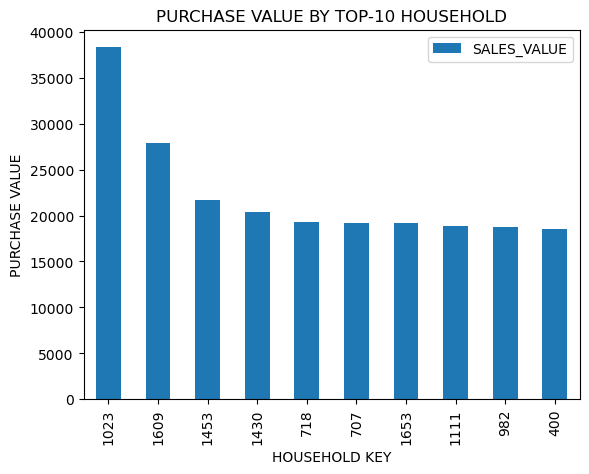

In [23]:
(transactions.groupby("household_key")[["SALES_VALUE"]].sum()
 .sort_values("SALES_VALUE",ascending=False)
.head(10).plot.bar(title="PURCHASE VALUE BY TOP-10 HOUSEHOLD",
                  xlabel="HOUSEHOLD KEY",
                  ylabel="PURCHASE VALUE"));

In [24]:
transactions.groupby("household_key")[["QUANTITY"]].sum().sort_values("QUANTITY",ascending=False).head(10)

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


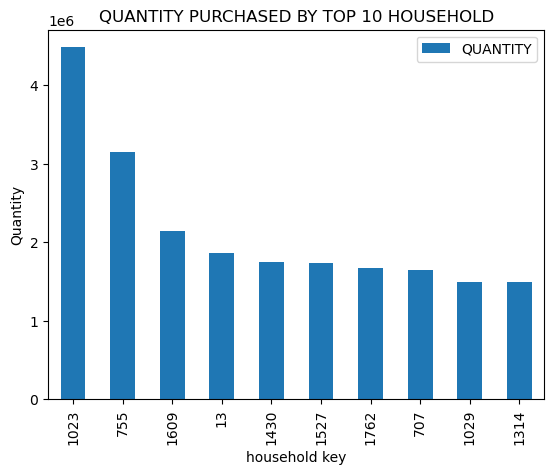

In [25]:
(transactions.groupby("household_key")[["QUANTITY"]].sum()
 .sort_values("QUANTITY",ascending=False)
 .head(10).plot.bar(title="QUANTITY PURCHASED BY TOP 10 HOUSEHOLD",
                   xlabel="household key",
                   ylabel="Quantity"));

## Product Analysis

* Which products had the most sales by sales_value?
* Looking for the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [26]:
top_hh_products=(transactions.groupby("PRODUCT_ID").agg({"SALES_VALUE":"sum"})
                 .sort_values("SALES_VALUE",ascending=False).iloc[:10])
top_hh_products


,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


In [27]:
products=pd.read_csv("product.csv")
products

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [28]:
products.query("PRODUCT_ID in @top_hh_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [29]:
merged_products_transactions=transactions.merge(products,how="left",
                  left_on="PRODUCT_ID",
                  right_on="PRODUCT_ID")
merged_products_transactions


,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,total_discount,percentage_disc,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0,0.00,0.000000,69,GROCERY,Private,CONVENIENT BRKFST/WHLSM SNACKS,GRANOLA BARS,10 OZ
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0,-0.40,0.133779,1075,GROCERY,National,CRACKERS/MISC BKD FD,SNACK CRACKERS,9.5 OZ
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0,0.00,0.000000,3664,MEAT,National,BEEF,GRND/PATTY - ROUND,
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0,-0.99,0.396000,2209,MEAT-PCKGD,National,BREAKFAST SAUSAGE/SANDWICHES,LINKS - RAW,12OZ
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0,-0.79,1.316667,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,0.00,102,0.0,0.0,0.00,0.000000,560,GROCERY,National,MARGARINES,MARGARINE: TUBS AND BOWLS,16 OZ
2146307,1598,42305362535,711,114102,1,8.89,3228,0.00,102,0.0,0.0,0.00,0.000000,2398,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2146308,1598,42305362535,711,133449,1,6.99,3228,0.00,102,0.0,0.0,0.00,0.000000,2468,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,12 OZ
2146309,1598,42305362535,711,6923644,1,4.50,3228,-0.49,102,0.0,0.0,-0.49,0.108889,2390,GROCERY,National,BEERS/ALES,BEERALEMALT LIQUORS,4PK/10 OZ


In [30]:
(merged_products_transactions
 .groupby(["COMMODITY_DESC","SUB_COMMODITY_DESC"])
.agg({"QUANTITY":"sum"})
 .sort_values("QUANTITY",ascending=False).iloc[:10])

QUANTITY
COMMODITY_DESC         SUB_COMMODITY_DESC                       
COUPON/MISC ITEMS      GASOLINE-REG UNLEADED           213852544
FUEL                   GASOLINE-REG UNLEADED               91030
FLUID MILK PRODUCTS    FLUID MILK WHITE ONLY               74561
YOGURT                 YOGURT NOT MULTI-PACKS              54172
SOFT DRINKS            SOFT DRINKS 12/18&15PK CAN CAR      46530
                       SFT DRNK 2 LITER BTL CARB INCL      44952
CANDY - CHECKLANE      CANDY BARS (SINGLES)(INCLUDING      37549
BAKED BREAD/BUNS/ROLLS MAINSTREAM WHITE BREAD              29254
CHEESE                 SHREDDED CHEESE                     28905
FRZN MEAT/MEAT DINNERS SS ECONOMY ENTREES/DINNERS ALL      26761